We want to solve equations of the type:
$$u(x) - \alpha u''(x) = f(x)$$
with Dirichlet boundary conditions $u(a) = u_a$ or $u(b) = u_b$ and/or Neumann boundary conditions $u'(a) = u'_a$ or $u'(b) = u'_b$ in a given interval $x \in (a,b)$.

We import the solvers needed as well as *numpy* and *matplotlib*:

In [3]:
from solver import bvp
import numpy as np
import matplotlib.pyplot as plt

Now we set $f(x) = 2 sin(x)$, $u(0) = 0$, $u'(\pi) = -1$ and $\alpha = 1$. That way $u(x) = sin(x)$ is the analytical solution of our new problem.

In [4]:
def f(x):
    """Function which defines the ODE we want to solve."""
    y = 2.0 * np.sin(x)
    return y

def exact(x):
    """The exact solution of the problem."""
    y = np.sin(x)
    return y

We iterate several times over the solver with different mesh sizes so we can check the order of the method which should be $\mathcal{O}(\Delta x ^ 2)$.

Boundary Value Problem.
Discretization error: 0.0019622308143281393
With N = 25 the order is = --- 

Discretization error: 0.0004913692826914436
With N = 50 the order is = 1.9976151762006389 

Discretization error: 0.00012289317696535644
With N = 100 the order is = 1.9994028528825998 

Discretization error: 3.072647483470608e-05
With N = 200 the order is = 1.9998506544011247 

Discretization error: 7.681817562542048e-06
With N = 400 the order is = 1.9999626534740522 

Discretization error: 1.9204670267344607e-06
With N = 800 the order is = 1.9999905074666682 



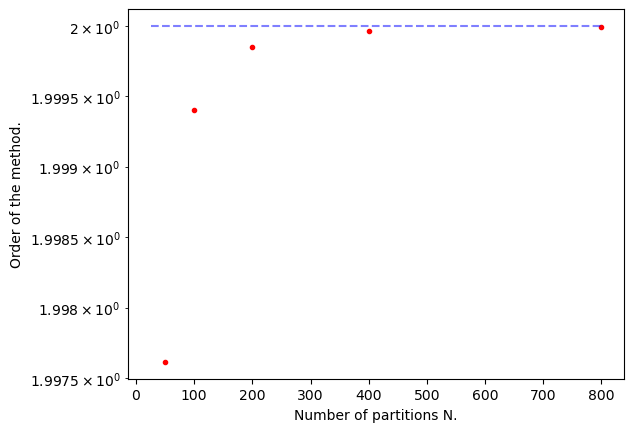

In [10]:
equation = bvp.BVPSolver(0,np.pi,1,0,-1,f,False,True,exact)  #We call an object from BVPSolver

mesh = [25,50,100,200,400,800]
order = np.zeros(len(mesh))
error0 = 1

print("Boundary Value Problem.")
for i in range(len(mesh)):
    error1 = equation.solution_error(N = mesh[i])
    if mesh[i] > mesh[0]:
        order[i] = np.log(error0 / error1)/np.log(2)
        print(f"With N = {mesh[i]} the order is = {order[i]} \n")
    else:
        print(f"With N = {mesh[0]} the order is = --- \n")
    error0 = error1

plt.figure("Convergence in order of BVPSolver")
plt.plot(mesh, order, ".r")
plt.plot(mesh, 2 * np.ones(len(mesh)), '--b', alpha = 0.5)
plt.xlabel("Number of subintervals N.")
plt.ylabel("Order of the method.")
plt.yscale('log')